In [8]:
library(choroplethr)
library(choroplethrMaps)
require(RCurl)
library(plyr)

library(ggplot2)
library(dplyr)
library(reshape2)
library(gridExtra)
library(knitr)
library(plotly)
library(maps)

Warning message:
"package 'choroplethr' was built under R version 3.4.3"Loading required package: acs
Warning message:
"package 'acs' was built under R version 3.4.3"Loading required package: stringr
Loading required package: XML

Attaching package: 'acs'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:base':

    apply

Warning message:
"package 'choroplethrMaps' was built under R version 3.4.3"Loading required package: RCurl
Loading required package: bitops
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate

In [18]:
county_df <- usmap::us_map(regions = "counties")
state_df <- usmap::us_map()

In [39]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/combined.csv'
df <-read.csv(text=getURL(url), sep=',',header=T)

In [12]:
#function to transform FIPS codes to the format consistent with fips column of county_df 
transform<-function (x) {if (x<=9999) {paste('0',as.character(x),sep='')} else {as.character(x)}}

In [26]:
#write fill colors for different schemes
colors_clusters=c("cluster_1"='yellow',
         "cluster_2"='green',
         "cluster_3"='red',
         "cluster_4"='turquoise',
         "cluster_5"='purple',
         "cluster_6"='pink',
         "cluster_7"='orange',
         "cluster_8"='grey',
         "cluster_9"='blue')
colors_subclusters=c("cluster_0"='lightgrey',
         "cluster_1"='yellow',
         "cluster_2"='red',
         "cluster_3"='purple')

colors_disease_groups=c("diabetic and obese"='orange',
         "only diabetic"='yellow',
         "only obese"='red',
         "no diabetic or obese"='blue',
         'others'='lightgrey')
cool = rainbow(50, start=rgb2hsv(col2rgb('cyan'))[1], end=rgb2hsv(col2rgb('blue'))[1])
warm = rainbow(50, start=rgb2hsv(col2rgb('red'))[1], end=rgb2hsv(col2rgb('yellow'))[1])
cols = c(rev(cool), rev(warm))
colors_continuous <- colorRampPalette(cols)(10)

Map of prevalence of diabetes of US counties

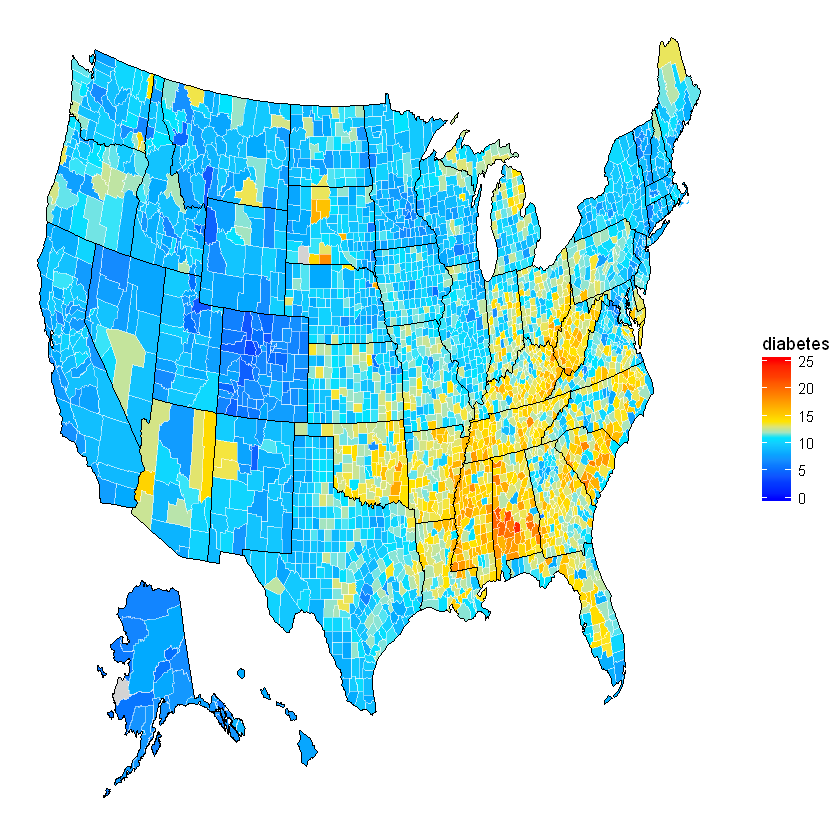

In [40]:
var<-'prevalence.of.diabetes'
var_name<-'diabetes'
df_sub<-subset(df, select = c("FIPS", var))
colnames(df_sub)<-c('fips', var_name)
df_sub$fips<-sapply(df_sub$fips, transform)

choropleth <- full_join(county_df, df_sub, by = c('fips'))
choropleth <- choropleth[!duplicated(choropleth$order), ]
    
library(scales)
    
p <-  ggplot(choropleth, aes(long, lat, group = group)) +
          geom_polygon(aes(fill=diabetes),colour = alpha("white", 1/2), size = 0.1)  +
          geom_polygon(data = state_df, colour = "black", fill = NA) +
          theme_void()

sc<-scale_fill_gradientn(colours = colors_continuous, limits=c(0, 25), na.value='lightgrey')
#sc<-scale_fill_manual(values = colors)
p<-p+sc
    
print (p)

In [ ]:
Map of prevalence of obesity of US counties

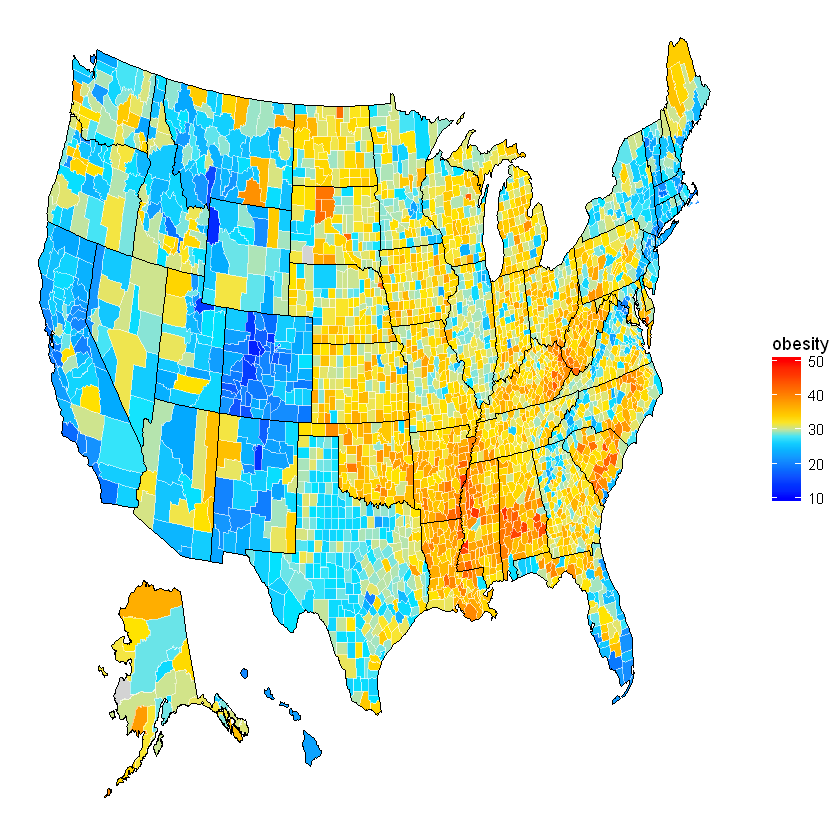

In [42]:
var<-'prevalence.of.obesity'
var_name<-'obesity'
df_sub<-subset(df, select = c("FIPS", var))
colnames(df_sub)<-c('fips', var_name)
df_sub$fips<-sapply(df_sub$fips, transform)

choropleth <- full_join(county_df, df_sub, by = c('fips'))
choropleth <- choropleth[!duplicated(choropleth$order), ]
    
library(scales)
    
p <-  ggplot(choropleth, aes(long, lat, group = group)) +
          geom_polygon(aes(fill=obesity),colour = alpha("white", 1/2), size = 0.1)  +
          geom_polygon(data = state_df, colour = "black", fill = NA) +
          theme_void()

sc<-scale_fill_gradientn(colours = colors_continuous, limits=c(10, 50), na.value='lightgrey')
#sc<-scale_fill_manual(values = colors)
p<-p+sc
    
print (p)

Map of counties with different combinations of prevalence of diabetes and prevalence of obesity

In [ ]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/combined.csv'
df <-read.csv(text=getURL(url), sep=',',header=T)